# Credit Card Transactions Analysis

link for Data
https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset

In [2]:
# Import required modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import seaborn as sns

In [4]:
# Load the Credit Card Transactions dataset into a Pandas DataFrame.
credit_card_df = pd.read_csv('./credit_card_transactions_updated.csv',index_col=0)
credit_card_df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,NaN,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,NaN,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,NaN,NaN,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,NaN,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,NaN,misc_pos,NaN,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,NaN,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158.0,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,NaN,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691.0,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,NaN,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018.0,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,2019-01-01 00:05:18,4922710831011201,NaN,misc_pos,NaN,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472.0,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,NaN,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785.0,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


## Project Deliverable 2: Attribute Types and Plot

In [5]:
# Get the list of all the columns
credit_card_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [6]:
# Get the size of the df.
credit_card_df.shape

(1296675, 23)

In [7]:
# Get the dtypes.
credit_card_df.dtypes

,0
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object


In [8]:
# Generate descriptive statistics for all columns.
credit_card_df.describe(include='all')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1296675,1.296675e+06,1217020,1202670,1.254173e+06,1296675,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296175e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
unique,1274791,NaN,646,14,NaN,352,481,2,983,894,...,NaN,NaN,495,968,1296675,NaN,NaN,NaN,NaN,NaN
top,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,...,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,4403,131636,NaN,26669,28794,709863,3123,5617,...,NaN,NaN,9778,5636,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.171920e+17,NaN,NaN,7.005288e+01,NaN,NaN,NaN,NaN,NaN,...,-9.022634e+01,9.012760e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,NaN,1.308806e+18,NaN,NaN,1.616998e+02,NaN,NaN,NaN,NaN,NaN,...,1.375908e+01,4.807764e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,NaN,1.800429e+14,NaN,NaN,9.580000e+00,NaN,NaN,NaN,NaN,NaN,...,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,NaN,3.521417e+15,NaN,NaN,4.690000e+01,NaN,NaN,NaN,NaN,NaN,...,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,NaN,4.642255e+15,NaN,NaN,8.267000e+01,NaN,NaN,NaN,NaN,NaN,...,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04


Here is_fraud looks like numerical having value 0,1 so we can covert into Categorical yes and no.

In [9]:
credit_card_df['is_fraud'] = credit_card_df['is_fraud'].replace({1: 'Yes', 0: 'No'})

Table to show the Data type for all the Fields.

| **Field Name**          | **Data Type**       | **Scale/Category**           |
|--------------------------|---------------------|------------------------------|
| trans_date_trans_time    | Categorical         | Ordinal                      |
| cc_num                  | Numerical           | Interval-Scaled              |
| merchant                | Categorical         | Nominal, Non-Binary          |
| category                | Categorical         | Nominal, Non-Binary          |
| amt                     | Numerical           | Ratio-Scaled                 |
| first                   | Categorical         | Nominal, Non-Binary          |
| last                    | Categorical         | Nominal, Non-Binary          |
| gender                  | Categorical         | Nominal, Binary, Symmetric  |
| street                  | Categorical         | Nominal, Non-Binary          |
| city                    | Categorical         | Nominal, Non-Binary          |
| state                   | Categorical         | Nominal, Non-Binary          |
| zip                     | Numerical           | Interval-Scaled              |
| lat                     | Numerical           | Ratio-Scaled                 |
| long                    | Numerical           | Ratio-Scaled                 |
| city_pop                | Numerical           | Interval-Scaled              |
| job                     | Categorical         | Nominal, Non-Binary          |
| dob                     | Categorical         | Ordinal                      |
| trans_num               | Numerical           | Interval-Scaled              |
| unix_time               | Numerical           | Interval-Scaled              |
| merch_lat               | Numerical           | Ratio-Scaled                 |
| merch_long              | Numerical           | Ratio-Scaled                 |
| is_fraud                | Categorical           | Nominal, Binary, Asymmetric              |
| merch_zipcode           | Numerical           | Interval-Scaled              |


Based on the above we can define the list of numerical and categorical attributes.

In [10]:
numerical_fields = credit_card_df.select_dtypes(include=['number']).columns
print(f'Numeric columns in the dataset:{numerical_fields}')
categorical_fields = credit_card_df.select_dtypes(include=['object']).columns
print(f'Categorical columns in the dataset:{categorical_fields}')

Numeric columns in the dataset:Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'merch_zipcode'],
      dtype='object')
Categorical columns in the dataset:Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num',
       'is_fraud'],
      dtype='object')


In [11]:
print('Missing Numerical Attributes')
for num_attr in numerical_fields:
  if(credit_card_df[num_attr].isna().any()):
    print(num_attr)

Missing Numerical Attributes
amt
city_pop
merch_zipcode


In [12]:
print('Missing Categorical Attributes')
for cat_attr in categorical_fields:
  if(credit_card_df[cat_attr].isna().any()):
    print(cat_attr)

Missing Categorical Attributes
merchant
category


### Numerical Attribute Anlysis

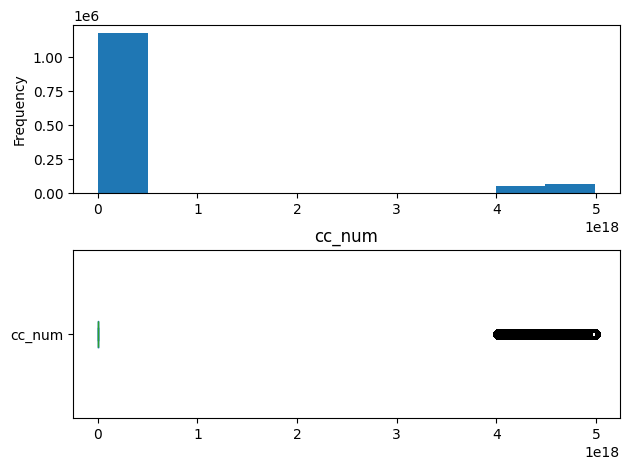

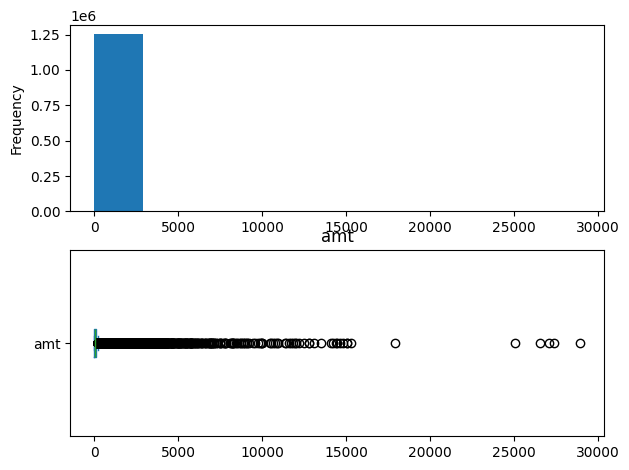

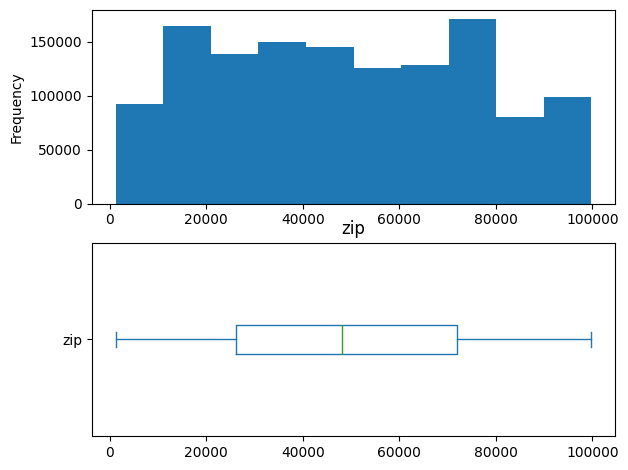

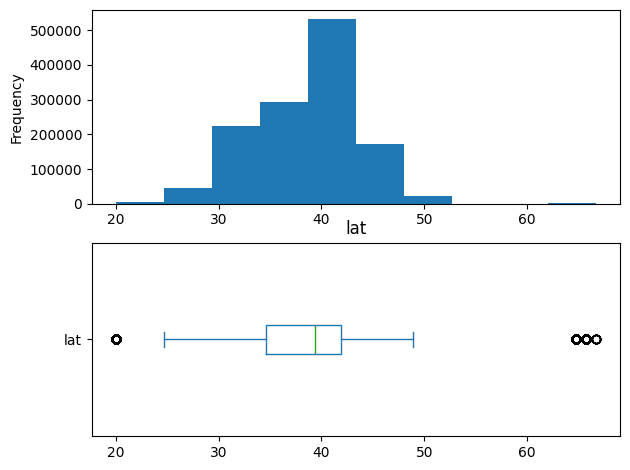

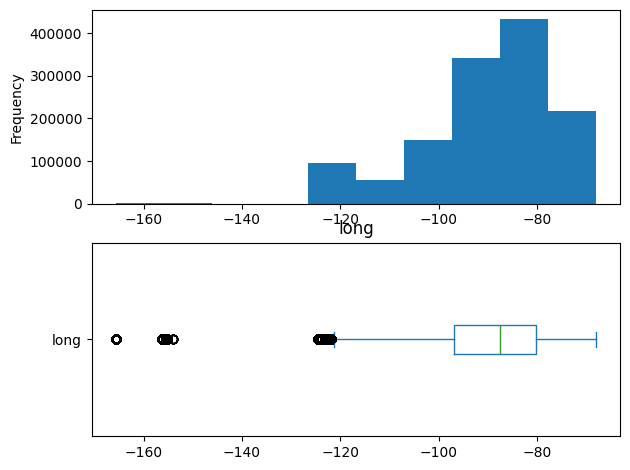

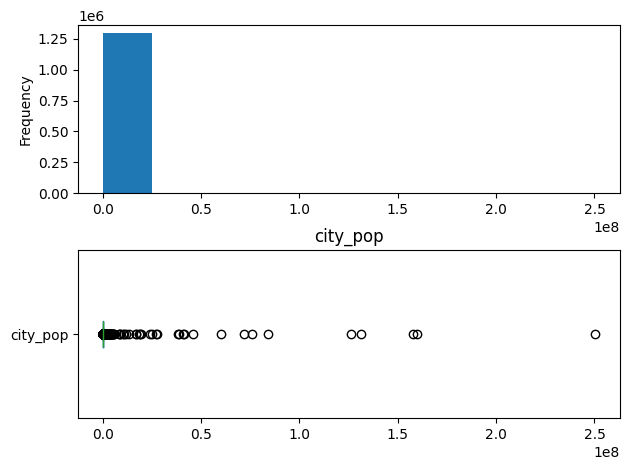

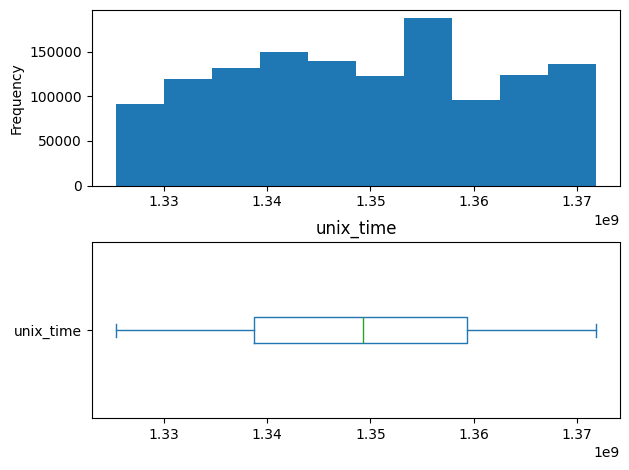

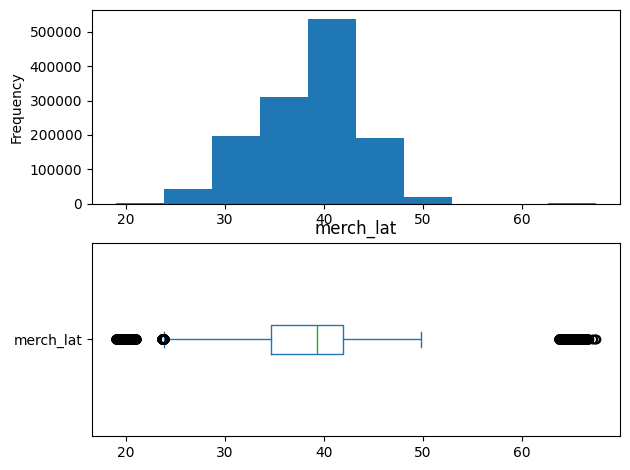

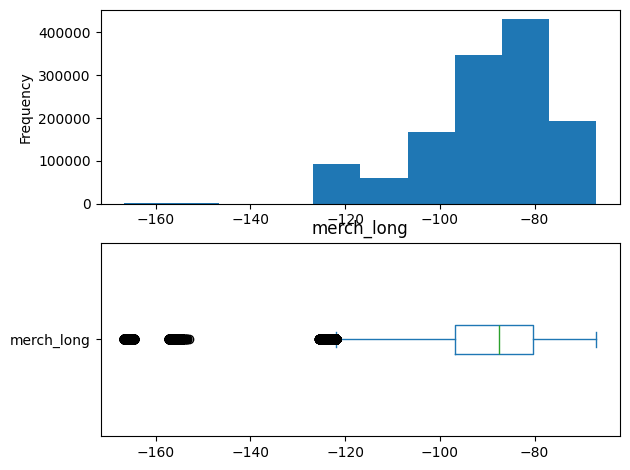

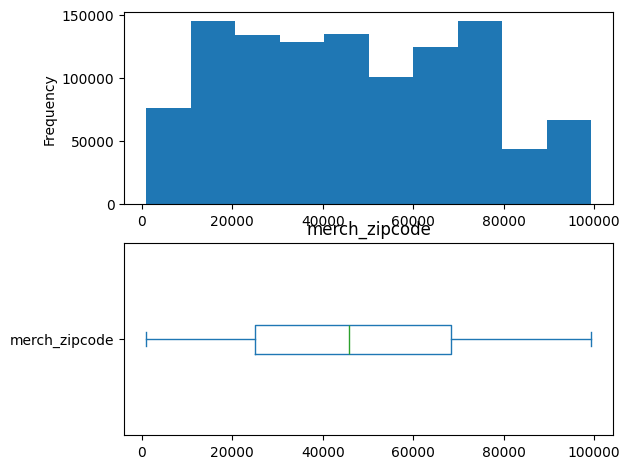

In [13]:
# Plot Histogram and box plot for all the numerical attribute to see there distribution.
for att in numerical_fields:
    plt.subplot(2,1,1)
    credit_card_df[att].plot.hist()
    plt.subplot(2,1,2)
    credit_card_df[att].plot.box(vert=False)
    plt.tight_layout()
    plt.title(att)
    plt.show()

To plot the box plot for amt properly plot the value but only for values below the 99th percentile so we can see more useful box plot.

Text(0.5, 1.0, 'Amount Box plot for 99 Percentile')

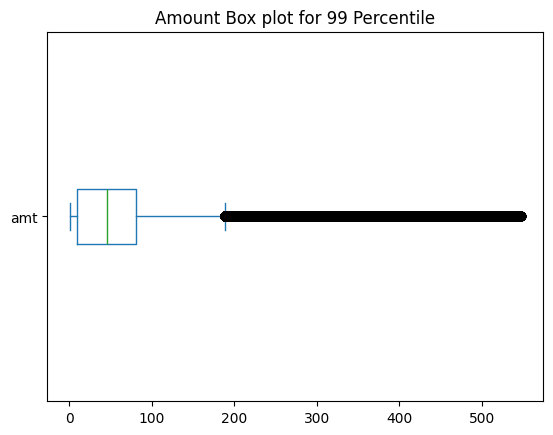

In [14]:
credit_card_df[credit_card_df['amt'] <credit_card_df['amt'].quantile(0.99)]['amt'].plot.box(vert=False)
plt.title('Amount Box plot for 99 Percentile')

Correlation matrix for numerical columns:


<Axes: >

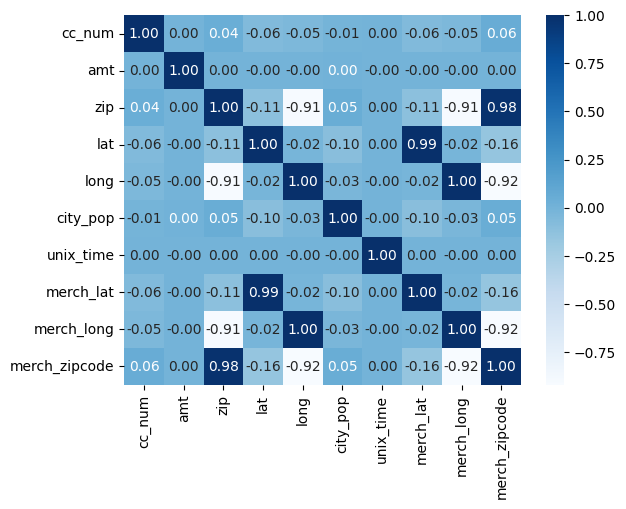

In [15]:
print("Correlation matrix for numerical columns:")
correlation_matrix = credit_card_df[numerical_fields].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues')

Check the correlation between all the attribute and get value who correlation is more than 0.7

In [16]:
threshold = 0.7
unique_pairs = set()  # Set to store unique column pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        column_name_1 = correlation_matrix.columns[i]
        column_name_2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        # Ensure it's not the same column and correlation exceeds the threshold
        if abs(correlation_value) > threshold and column_name_1 != column_name_2:
            # Use sorted tuple to ensure uniqueness of pairs
            pair = tuple(sorted([column_name_1, column_name_2]))
            if pair not in unique_pairs:  # Add only if the pair is not already in the set
                unique_pairs.add(pair)
                print(f"Correlation between {pair[0]} and {pair[1]}: {correlation_value}")
# Optionally, convert the set to a list or DataFrame if needed
unique_pairs_list = list(unique_pairs)

Correlation between long and zip: -0.9097321224067211
Correlation between merch_long and zip: -0.9089240265893986
Correlation between merch_zipcode and zip: 0.9809628265295786
Correlation between lat and merch_lat: 0.9935923591974981
Correlation between long and merch_long: 0.9991195818341416
Correlation between long and merch_zipcode: -0.9194442800499029
Correlation between merch_long and merch_zipcode: -0.920664129886764


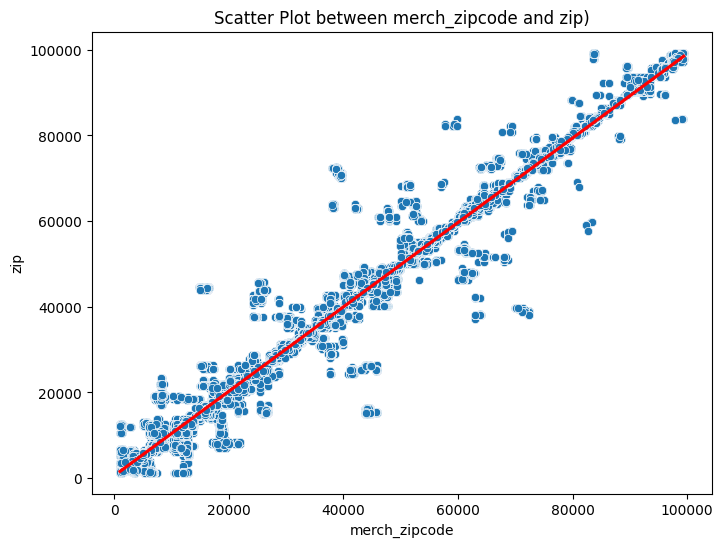

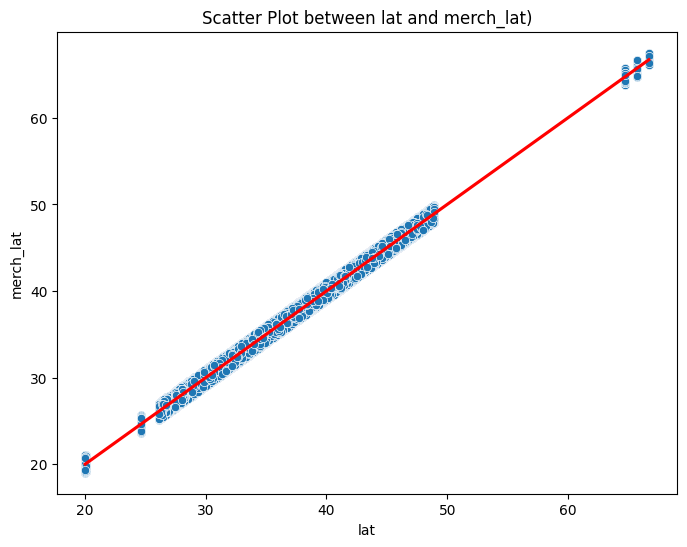

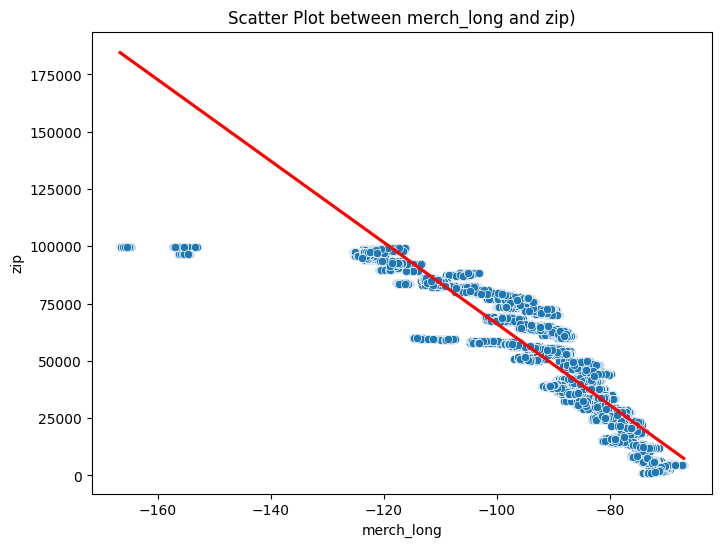

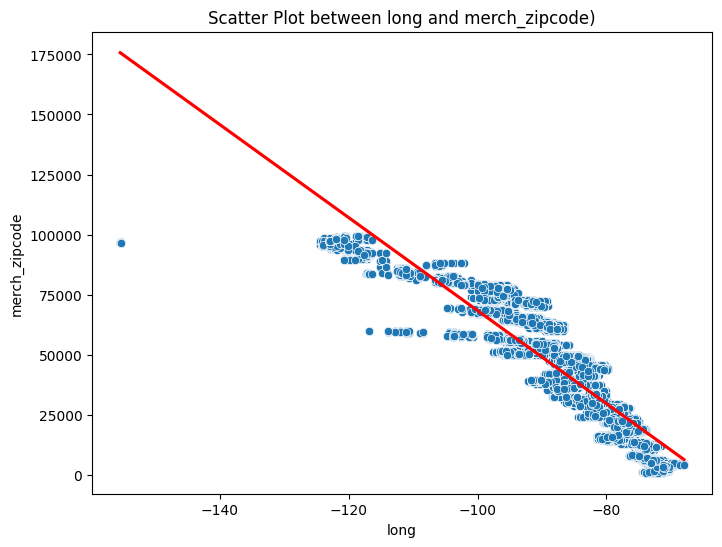

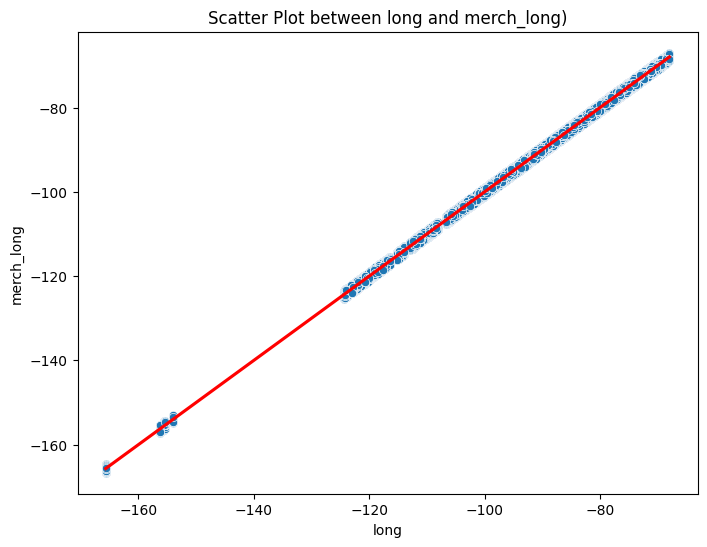

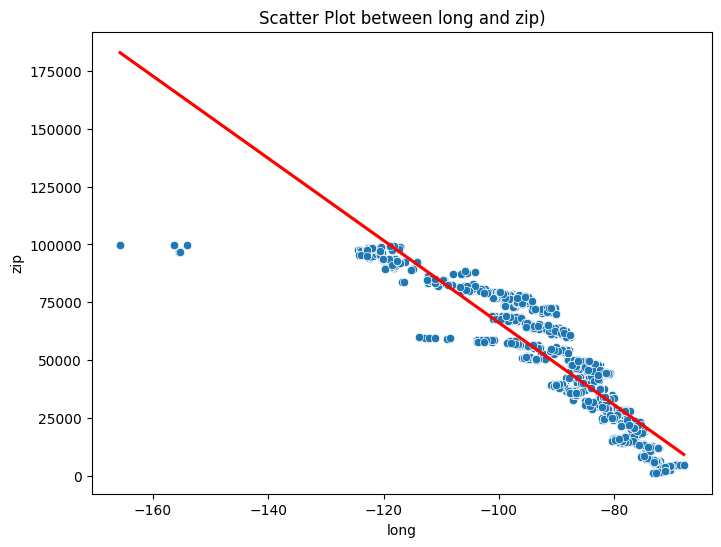

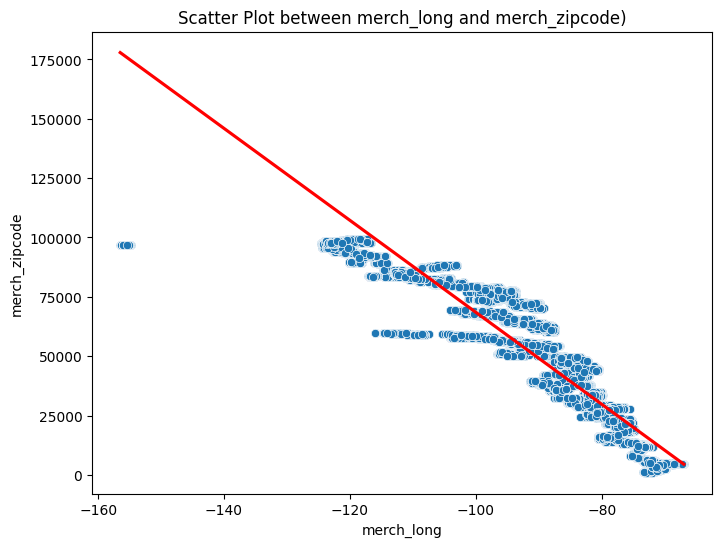

In [17]:
for attr1,attr2 in unique_pairs_list:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=credit_card_df[attr1], y=credit_card_df[attr2])
    plt.title(f"Scatter Plot between {attr1} and {attr2})")
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    sns.regplot(x=credit_card_df[attr1], y=credit_card_df[attr2], scatter=False, color='red', ci=None)
    plt.show()

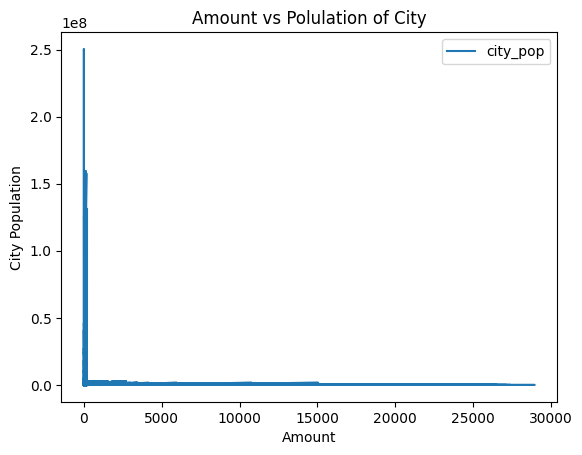

In [18]:
list_numerical_value = ['city_pop']
for col in list_numerical_value:
    plt.plot(credit_card_df['amt'], credit_card_df[col], label=col)
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.title('Amount vs Polulation of City')
plt.legend()
plt.show()

In [19]:
plt.rcParams['agg.path.chunksize'] = 10000  # Increase the chunk size
plt.rcParams['path.simplify_threshold'] = 0.5  # Increase simplification threshold

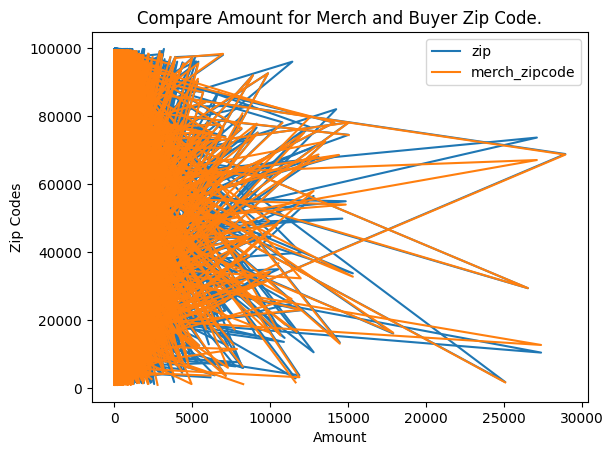

In [20]:
list_numerical_value = ['zip','merch_zipcode']
for col in list_numerical_value:
    plt.plot(credit_card_df['amt'], credit_card_df[col], label=col)
plt.xlabel('Amount')
plt.ylabel('Zip Codes')
plt.title('Compare Amount for Merch and Buyer Zip Code.')
plt.legend()
plt.show()

### Categorical Attribute Anlysis



Draw Bar graph for all the Dategorical Data to show the frequnecy.

* Plot bar chart for each column who has unique value less than 500.
* since trans_num , name can be unique or lot of unique value no point in point those.

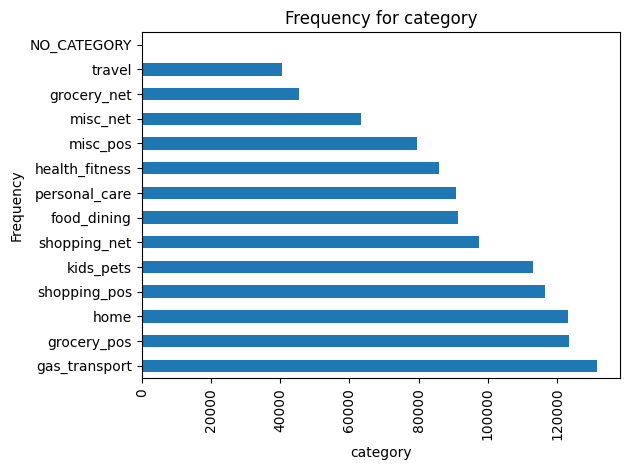

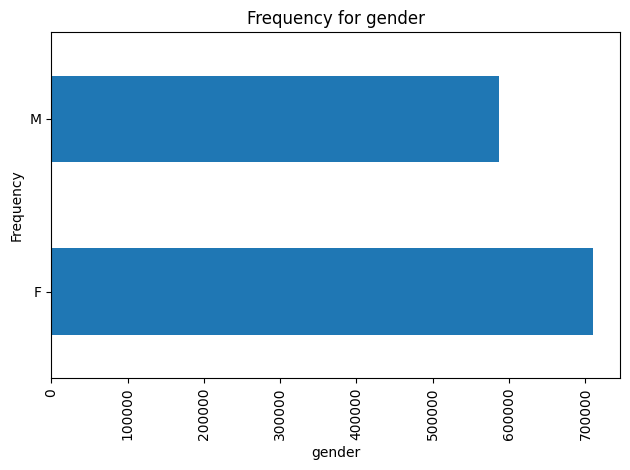

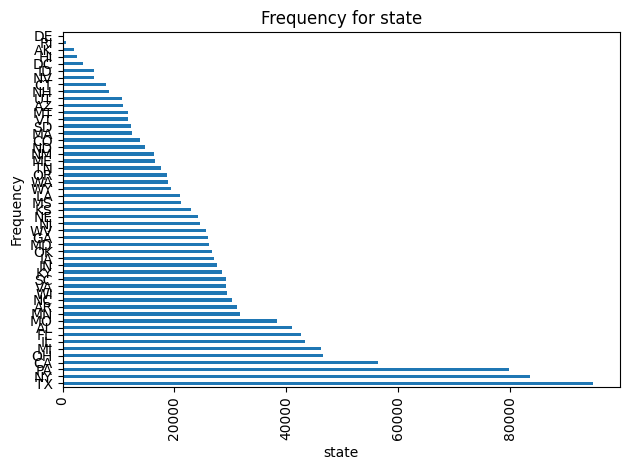

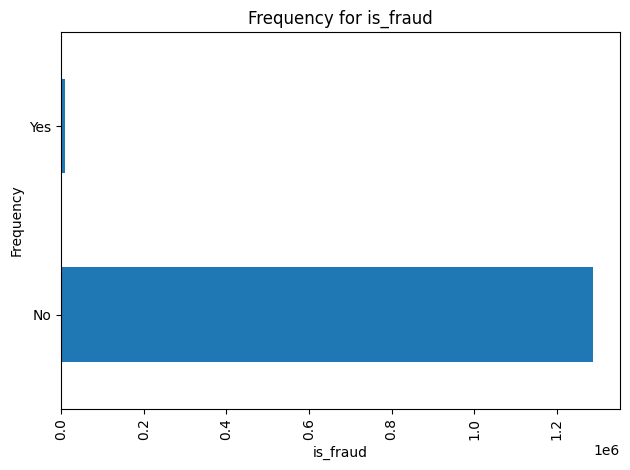

In [21]:
for col in categorical_fields:
    # Plot bar chart for each column who has unique value less than 100.
    # since trans_num , name can be unique for all valu
    if len(credit_card_df[col].unique()) < 100:
        credit_card_df[col].value_counts().plot(kind='barh')  # Add `figsize` for consistent size
        plt.xlabel(col)  # Label for x-axis
        plt.title(f'Frequency for {col}')
        plt.ylabel('Frequency')  # Label for y-axis
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()  # Display the plot

For Plot that can more than 100 unqiue value plot only top 15 values

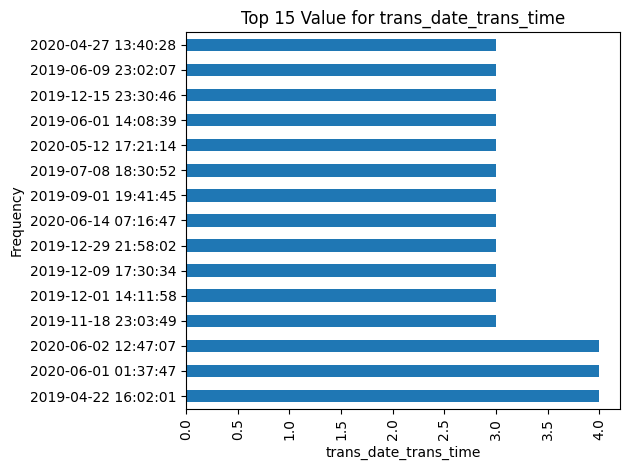

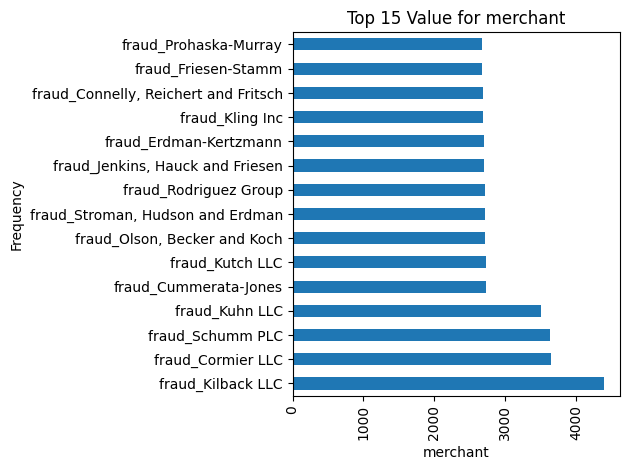

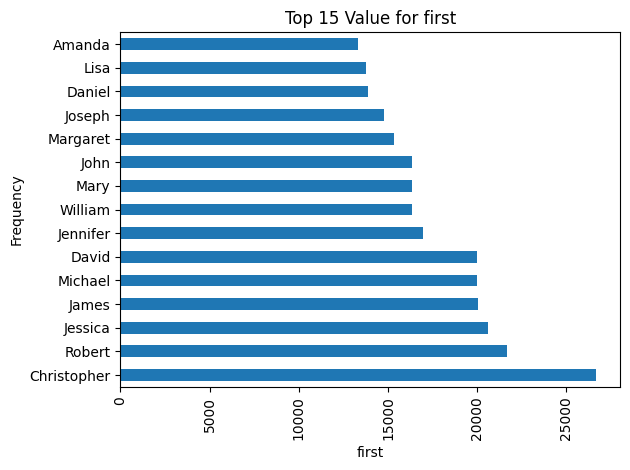

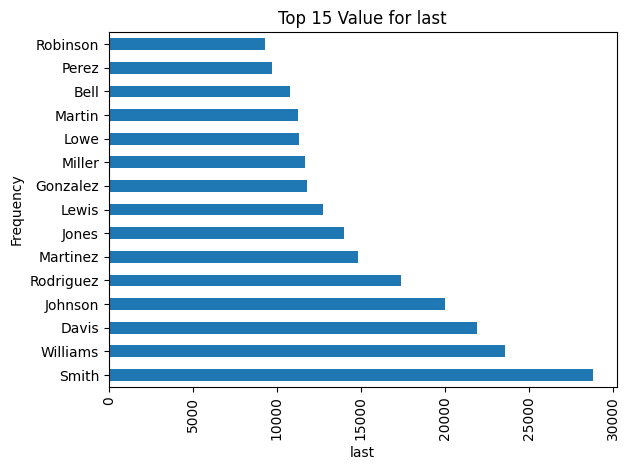

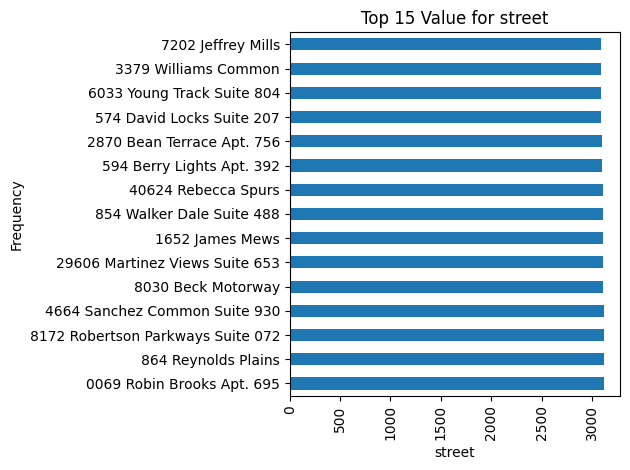

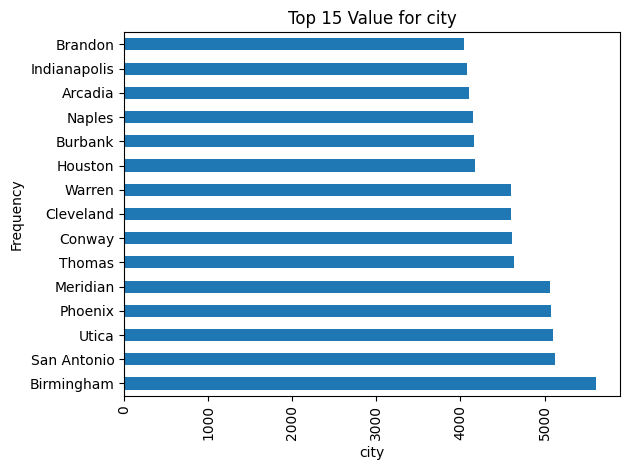

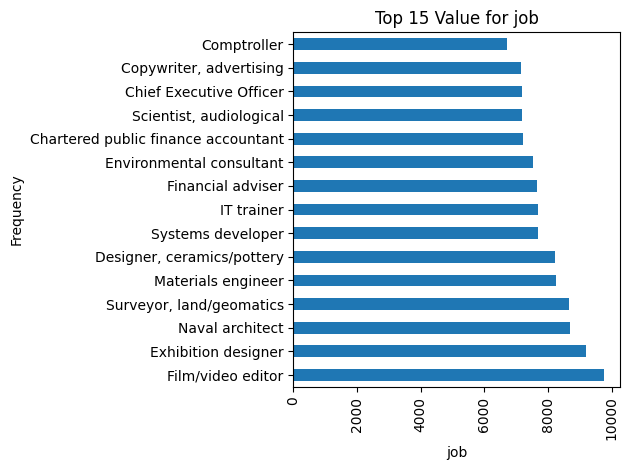

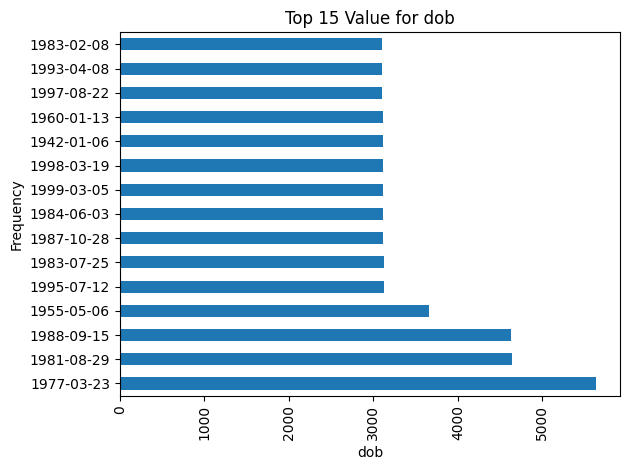

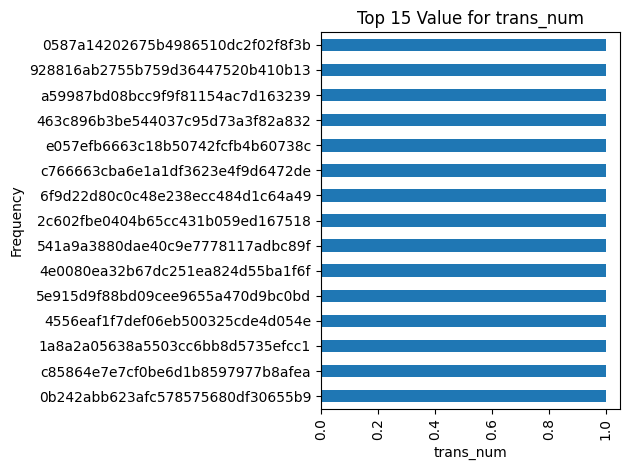

In [22]:
    # Plot bar chart for each column who has unique value more than 500.
    # Plot only top 15 values.
    for col in categorical_fields:
      if len(credit_card_df[col].unique()) > 100:
        cat_attr = credit_card_df[col].value_counts()
        top_cat = cat_attr[:15]
        top_cat.plot(kind='barh')  # Add `figsize` for consistent size
        plt.xlabel(col)  # Label for x-axis
        plt.title(f'Top 15 Value for {col}')
        plt.ylabel('Frequency')  # Label for y-axis
        plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()  # Display the plot

In [23]:
categorical_fields

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num',
       'is_fraud'],
      dtype='object')

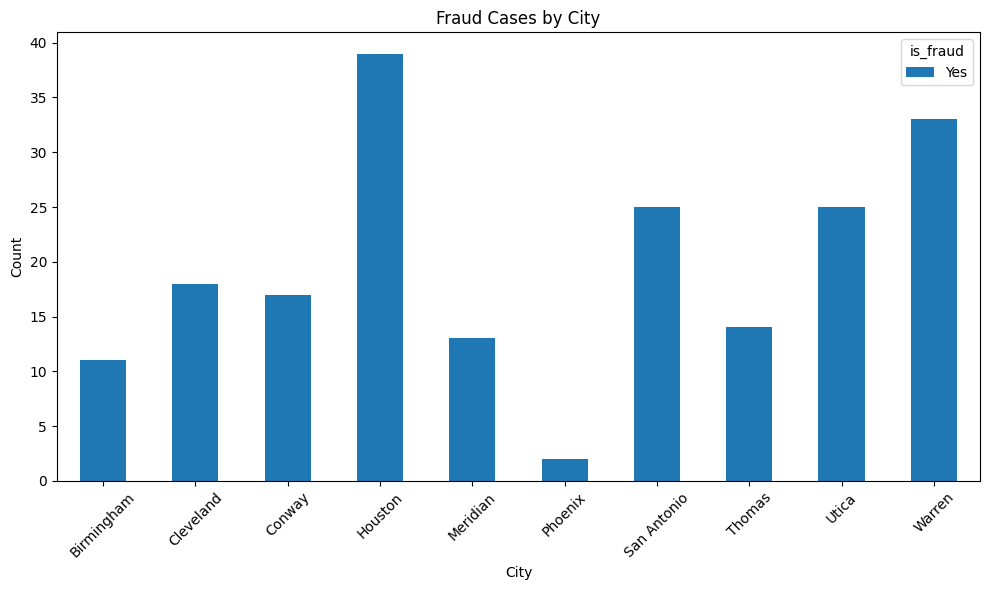

In [24]:
# Check Fraud for top 10 City that has fraud.
city_attr = credit_card_df['city'].value_counts()
top_cities = city_attr[:10].index  # Get the names of the top 10 cities
filtered_df = credit_card_df[(credit_card_df['is_fraud'] == 'Yes') & (credit_card_df['city'].isin(top_cities))]
crosstab = pd.crosstab(filtered_df['city'], filtered_df['is_fraud'])
crosstab.plot(kind='bar', figsize=(10, 6))
plt.title("Fraud Cases by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()

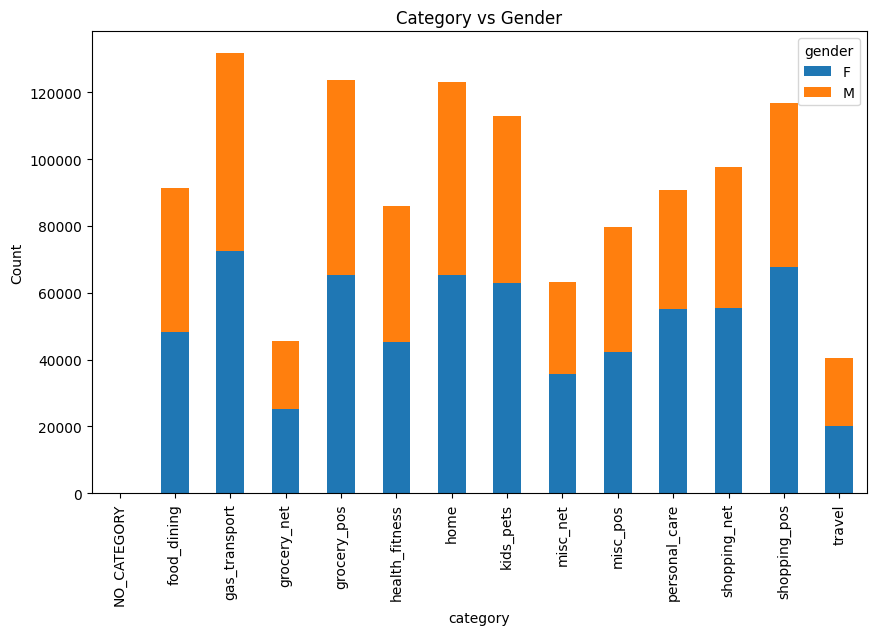

In [25]:
# comapre the Gender and Categoty wih each other.
pd.crosstab(credit_card_df['category'], credit_card_df['gender']).plot(
    kind='bar', stacked=True, figsize=(10, 6), title="Category vs Gender"
)
plt.xlabel('category')
plt.ylabel('Count')
plt.show()

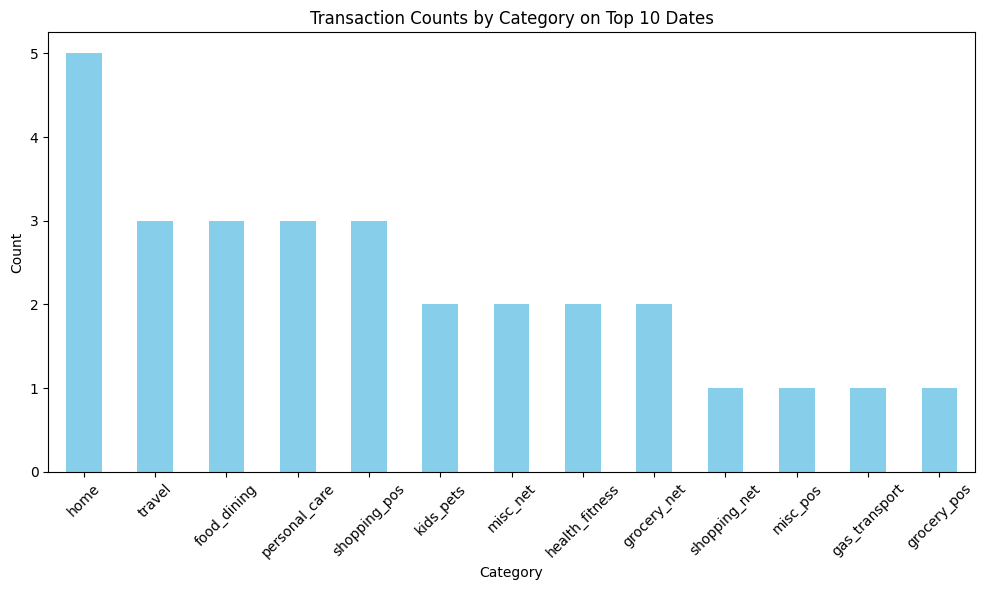

In [26]:
# Get the top 10 dates by transaction frequency
date_attr = credit_card_df['trans_date_trans_time'].value_counts()
top_dates = date_attr[:10].index  # Get the top 10 dates
# Filter the DataFrame to include only transactions on the top 10 dates
filtered_df = credit_card_df[credit_card_df['trans_date_trans_time'].isin(top_dates)]
category_counts = filtered_df['category'].value_counts()
# Plot the category counts
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Transaction Counts by Category on Top 10 Dates")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

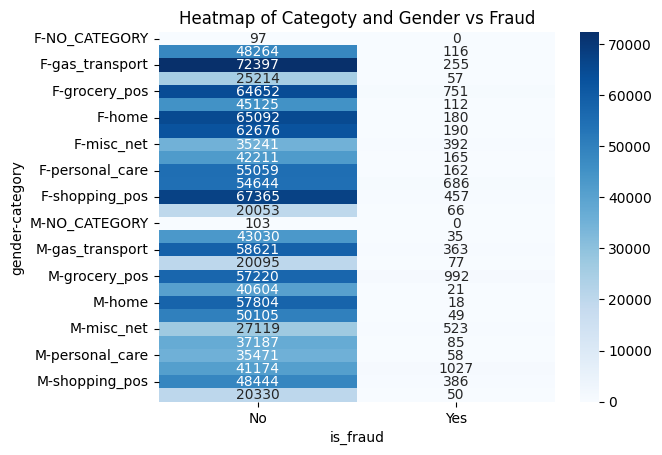

In [27]:
heatmap_data = pd.crosstab(
    [credit_card_df['gender'], credit_card_df['category']],
    credit_card_df['is_fraud']
)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Categoty and Gender vs Fraud")
plt.show()

# Plot Combination of Numerical and Categorical

Draw the Box plot for the below Categorical and Numerical Attribute for 95 Percentile numerical attribute for top 10 categorical.

In [59]:
plot_combination_boxplot = [
    ('category', 'amt'),
    ('gender', 'amt'),
    ('merchant', 'merch_zipcode'),
    ('trans_date_trans_time', 'zip'),
]

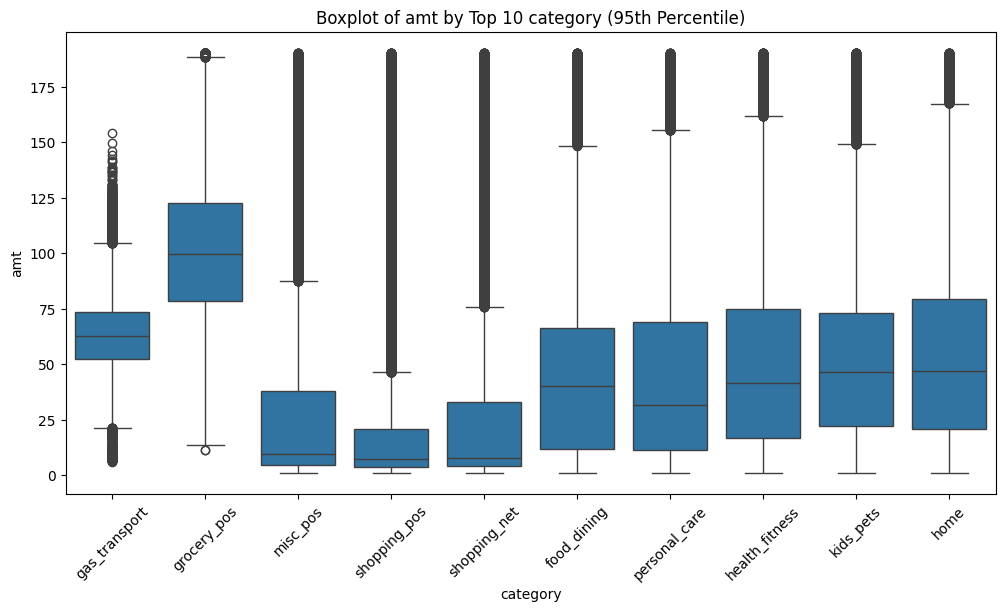

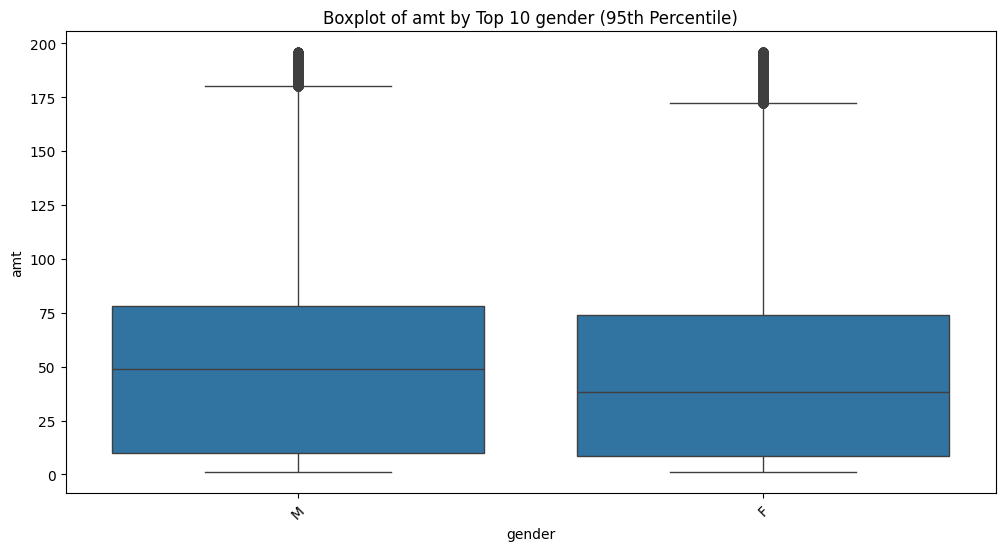

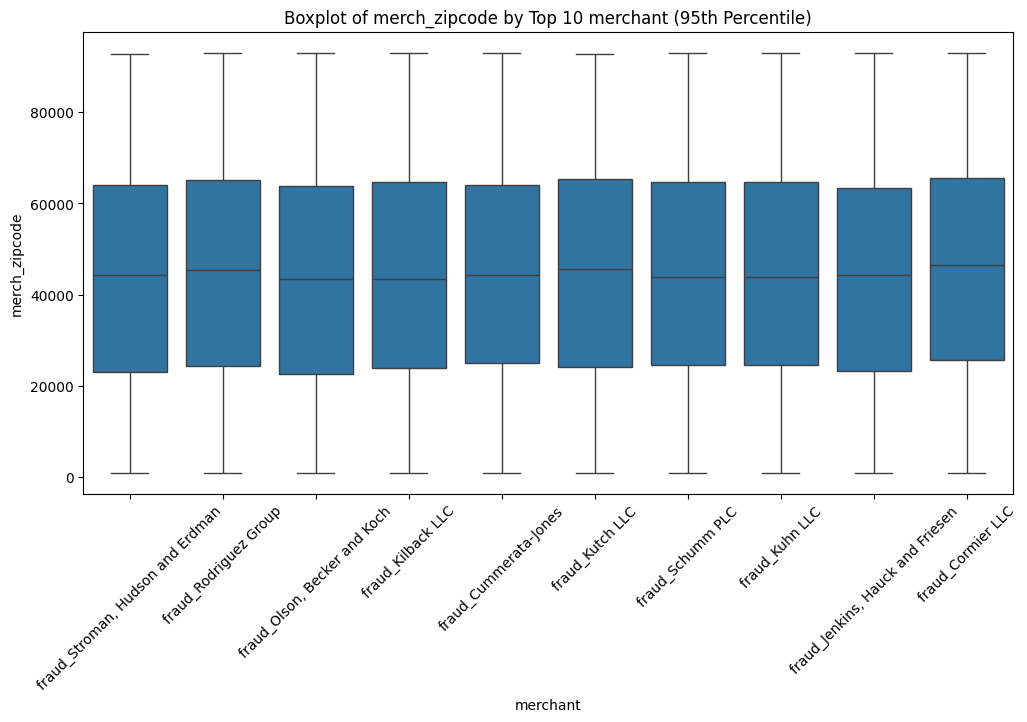

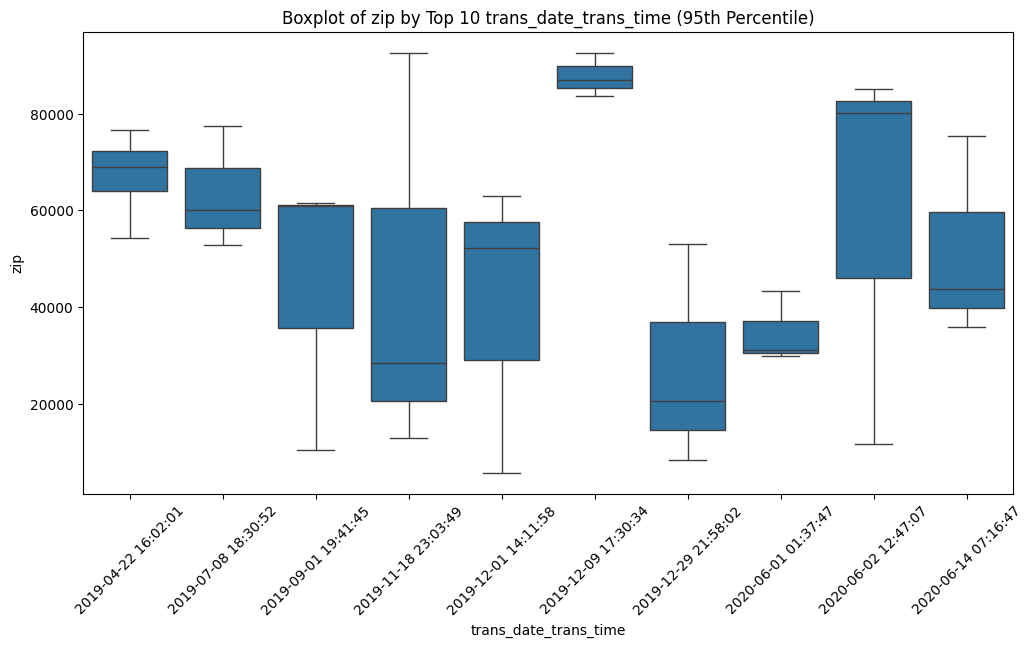

In [60]:
for cat_col,num_col in plot_combination_boxplot:
    # Filter the top 10 categories
    top_10_categories = credit_card_df[cat_col].value_counts().head(10).index
    filtered_df = credit_card_df[credit_card_df[cat_col].isin(top_10_categories)]
    # Filter the numerical column to the 95th percentile
    percentile = filtered_df[num_col].quantile(0.95)
    filtered_df = filtered_df[filtered_df[num_col] <= percentile]
    # Create the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y=num_col, data=filtered_df)
    plt.title(f'Boxplot of {num_col} by Top 10 {cat_col} (95th Percentile)')
    plt.xticks(rotation=45)
    plt.show()

In [61]:
numerical_fields

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'merch_zipcode'],
      dtype='object')

In [62]:
categorical_fields

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num',
       'is_fraud'],
      dtype='object')

In [69]:
plot_combination_barchart = [
    ('city', 'amt'),
    ('gender', 'amt'),
    ('job', 'amt'),
    ('merchant', 'amt'),
    ('merchant','merch_zipcode')
]

Draw the Bar Chart for all the above combination.

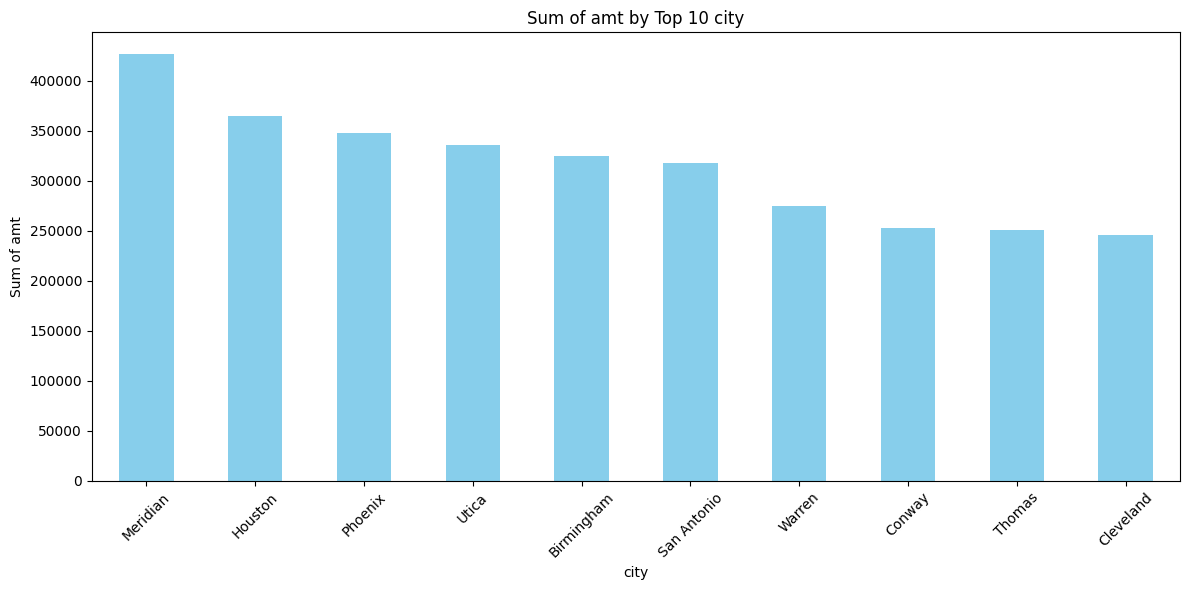

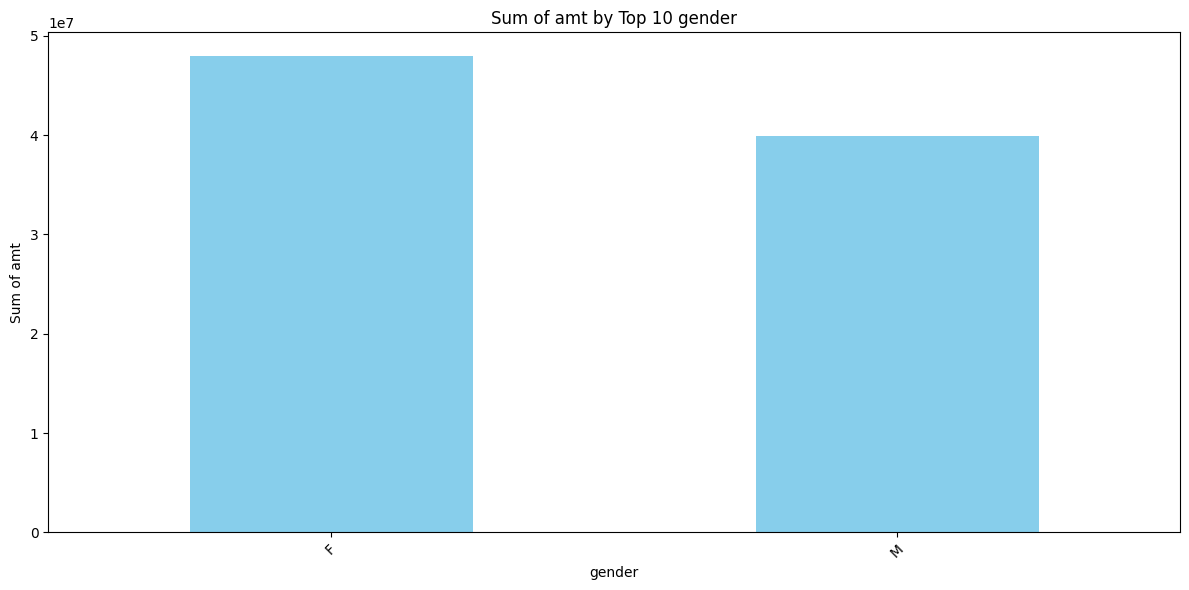

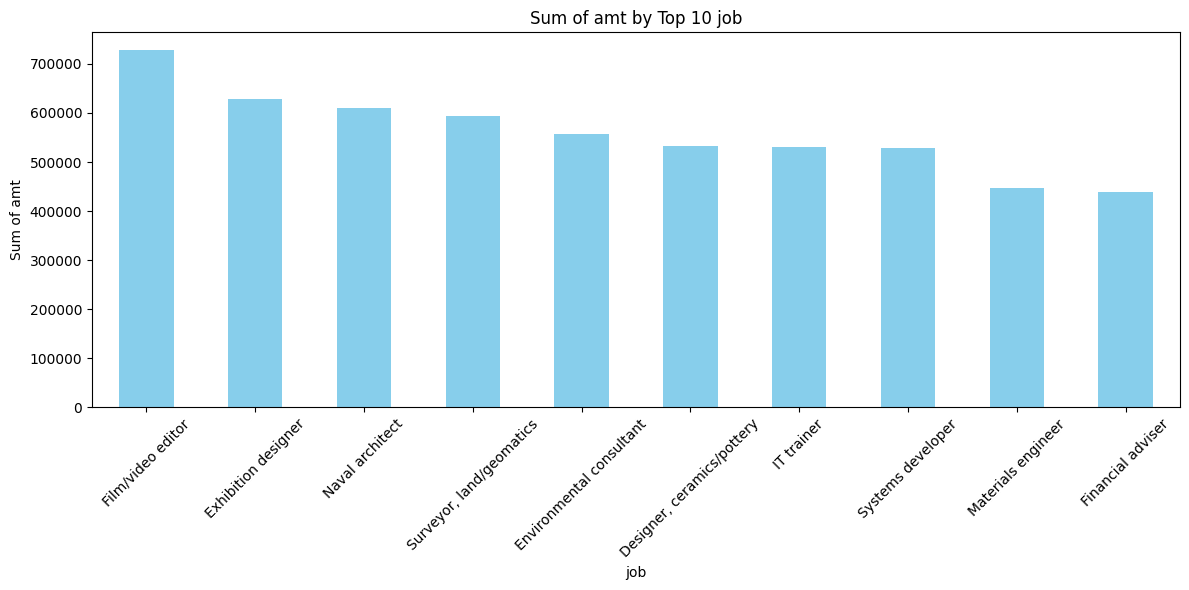

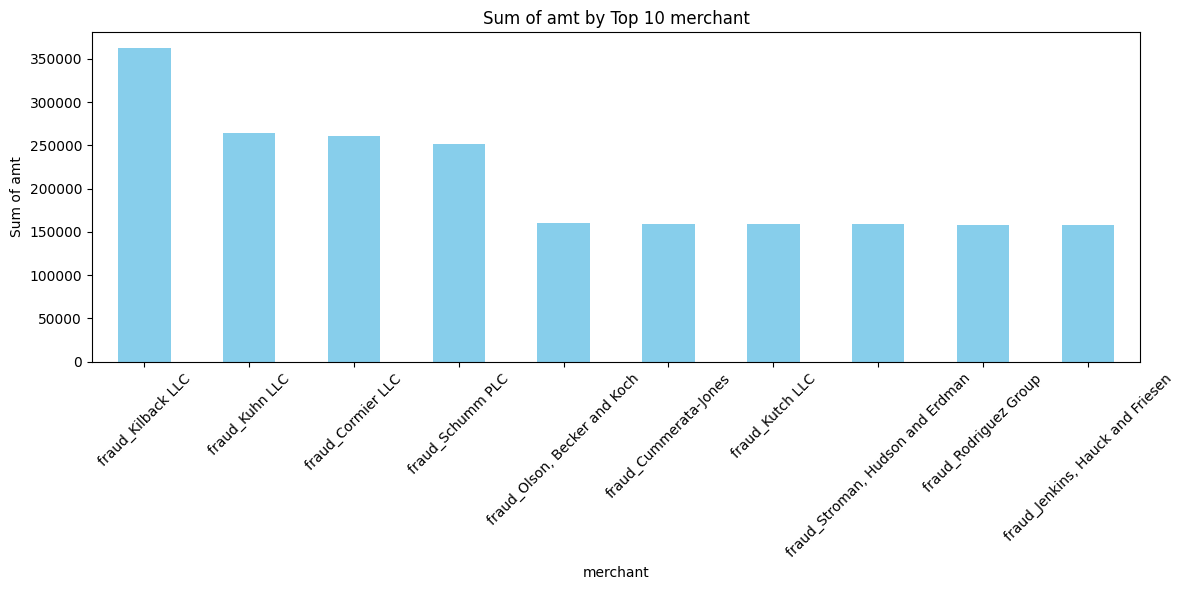

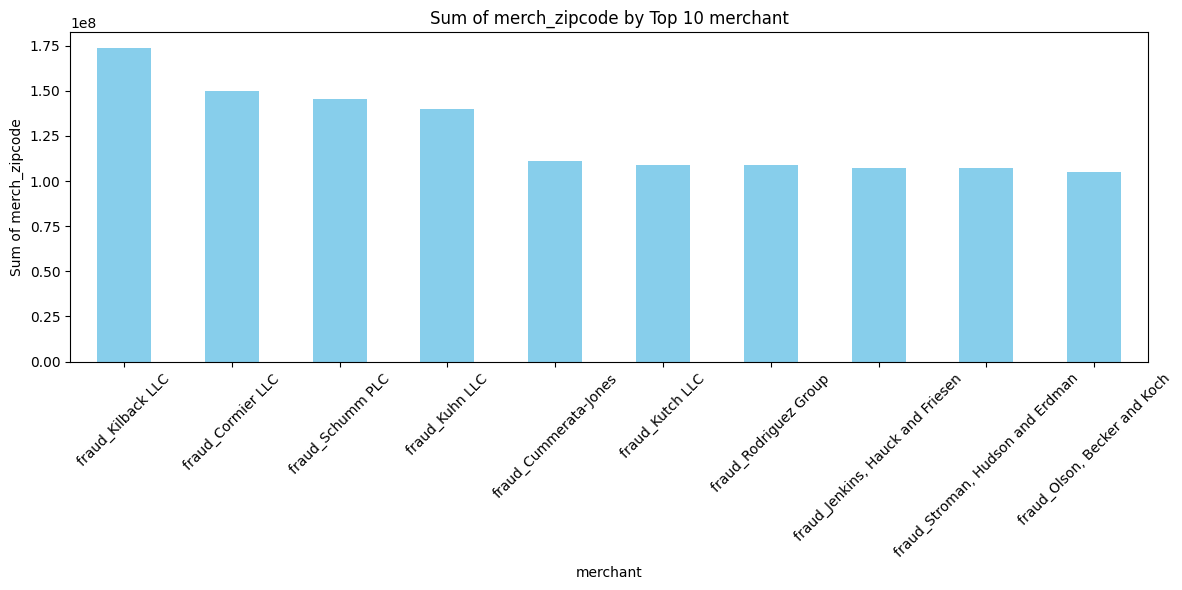

In [71]:
for  cat_col,num_col in plot_combination_barchart:
    # Filter the top 10 categories
    top_10_categories = credit_card_df[cat_col].value_counts().head(10).index
    filtered_df = credit_card_df[credit_card_df[cat_col].isin(top_10_categories)]
    # Aggregate data for the bar chart (sum of numerical values for each category)
    aggregated_data = filtered_df.groupby(cat_col)[num_col].sum().sort_values(ascending=False)
    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    aggregated_data.plot(kind='bar', color='skyblue')
    plt.title(f'Sum of {num_col} by Top 10 {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(f'Sum of {num_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent cutoff
    plt.show()